# SML Q1

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('delivery_time.csv')
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Text(0, 0.5, 'Sorting_Time')

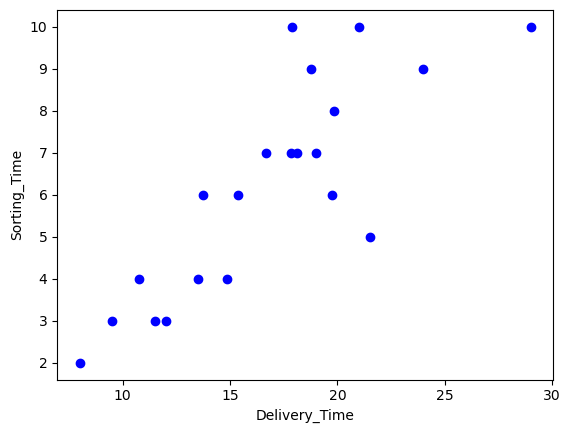

In [2]:
import matplotlib.pyplot as plt
plt.plot(data.Delivery_Time,data.Sorting_Time, "bo") 
plt.xlabel("Delivery_Time")
plt.ylabel("Sorting_Time") 

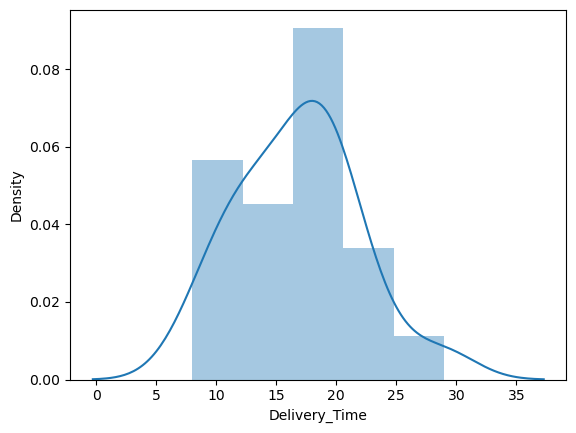

In [4]:
import seaborn as sns
sns.distplot(data['Delivery_Time'])
import warnings
warnings.filterwarnings('ignore') 

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

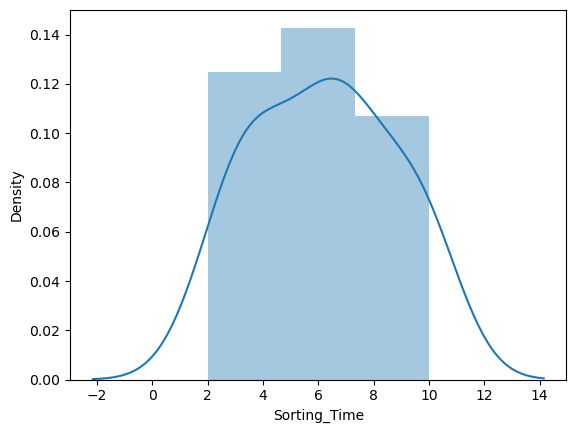

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['Sorting_Time']) 

Text(0.5, 1.0, 'ScatterPlot')

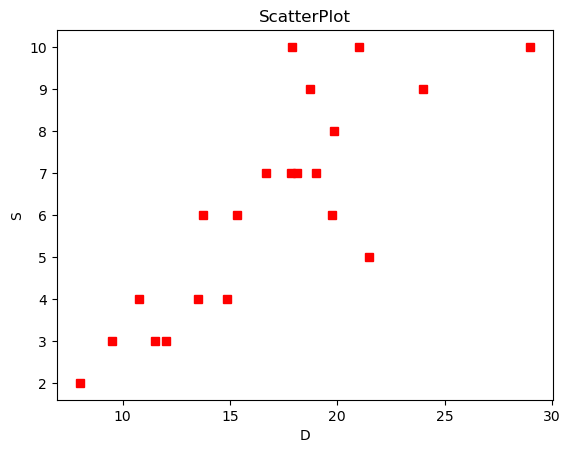

In [6]:
plt.plot(data.Delivery_Time,data.Sorting_Time,"rs")
plt.xlabel("D")
plt.ylabel("S")
plt.title("ScatterPlot")   

In [7]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [9]:
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time~Sorting_Time',data=data).fit()
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [10]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        18:51:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model.resid  

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [13]:
pred = model.predict(data.Sorting_Time)
pred 

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [14]:
 model.resid_pearson # Actual and predicted value 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [17]:
rmse_lin = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred))**2))
rmse_lin 

10.722052392104555

Text(0, 0.5, 'Delivery time')

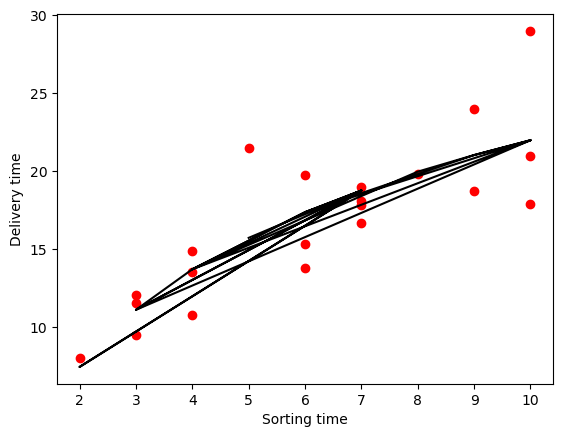

In [43]:
#import matplotlib.pylab as plt
plt.scatter(x=data.Sorting_Time, y=data.Delivery_Time, color='red')
plt.plot(data.Sorting_Time, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [20]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=data).fit()

In [21]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        20:52:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
pred2 = model2.predict(pd.DataFrame(data['Sorting_Time'])) 
pred2  

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [30]:
rmse_log = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred2))**2))
rmse_log

10.749542066249479

In [31]:
pred2.corr(data.Sorting_Time)

0.9774469985241836

Text(0, 0.5, 'Delivery time')

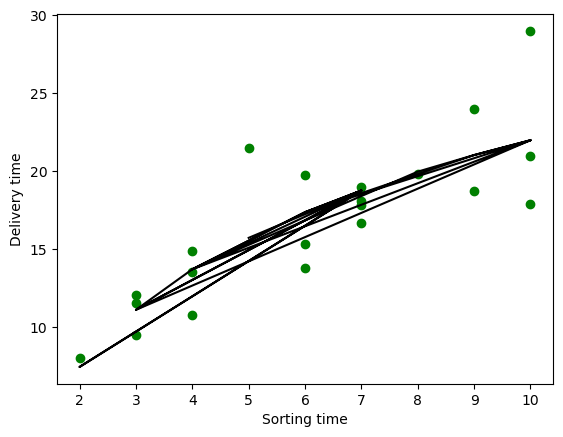

In [39]:
#plt.scatter(x=data['Delivery_Time'],y=data['Sorting_Time'],color='green')
#plt.plot(data['Sorting_Time'],pred2,color='blue')
#plt.xlabel('Sorting_Time')
#plt.ylabel('Tissue') 

plt.scatter(x=data.Sorting_Time, y=data.Delivery_Time, color='green')
plt.plot(data.Sorting_Time, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [41]:
dt_st=data.rename(columns={'Delivery_Time': 'dt','Sorting_Time': 'st' })

In [42]:
#exponential model
model3 = smf.ols('np.log(dt_st.st)~dt_st.dt',data=dt_st).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(dt_st.st)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        00:58:33   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
dt_st.dt       0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pred_log = model3.predict(pd.DataFrame(data['Delivery_Time']))

In [47]:
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [48]:
pred3=np.exp(pred_log)  
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [49]:
rmse_exp = np.sqrt(np.mean((np.array(data['Delivery_Time'])-np.array(pred3))**2)) 
rmse_exp

11.025443419556954

In [50]:
pred3.corr(data.Delivery_Time)

0.9637367208375696

Text(0, 0.5, 'Sorting_Time')

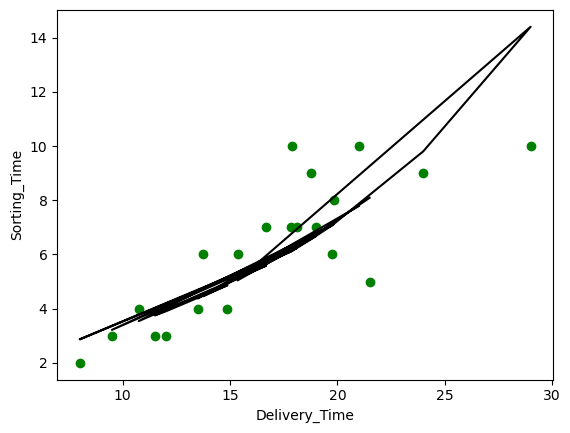

In [54]:
plt.scatter(x=data.Delivery_Time, y=data.Sorting_Time, color='green')
plt.plot(data.Delivery_Time, pred3,color='black')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time')

In [55]:
student_resid = model3.resid_pearson 
student_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Standardized Residual')

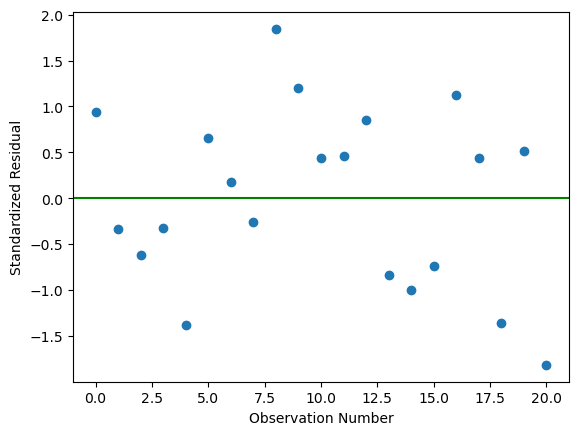

In [56]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

In [57]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,10.722052,0.682271
1,rmse_log,10.749542,0.695443
2,rmse_exp,11.025443,0.695443


# Q2

In [58]:
#Salary_hike -> Build a prediction model for Salary_hike

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [61]:
import pandas as pd
data = pd.read_csv('Salary_Data.csv')
data
data1=data.rename(columns={'YearsExperience': 'YE','Salary': 'S' })
data1

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [62]:
data1.describe()

,YE,S
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YE', ylabel='Density'>

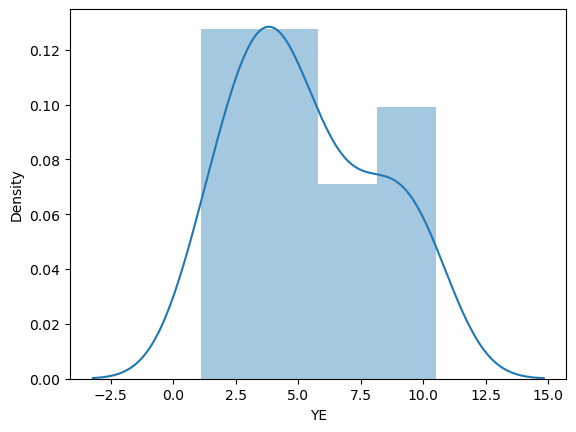

In [63]:
sns.distplot(data1['YE'])

<AxesSubplot:xlabel='S', ylabel='Density'>

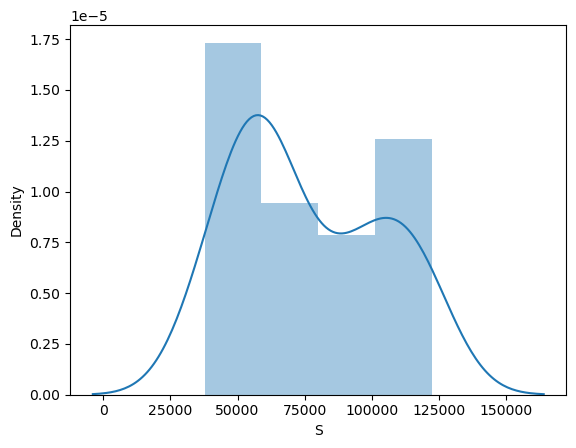

In [64]:
sns.distplot(data1['S'])

#Correlation Analysis

In [65]:
data1.corr()

,YE,S
YE,1.000000,0.978242
S,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

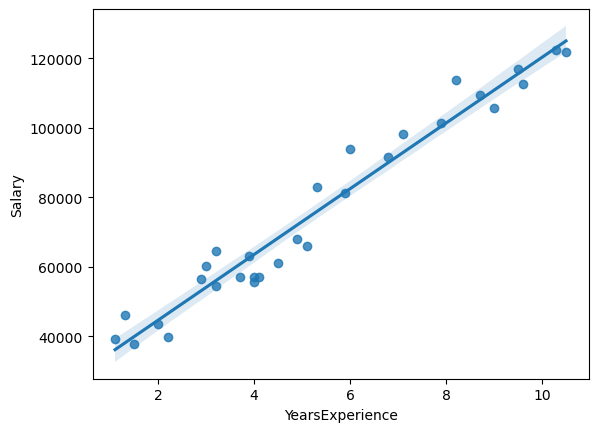

In [68]:
sns.regplot(x=data['YearsExperience'],y=data['Salary']) 

# Model Building

In [70]:
model=smf.ols("S~YE",data=data1).fit() 

In [72]:
model.params 

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [73]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        09:34:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model.resid 

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [75]:
pred = model.predict(data1.YE)
pred  

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [76]:
 model.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [78]:
rmse_lin = np.sqrt(np.mean((np.array(data1['S'])-np.array(pred))**2))
rmse_lin  

5592.043608760662

Text(0, 0.5, 'S')

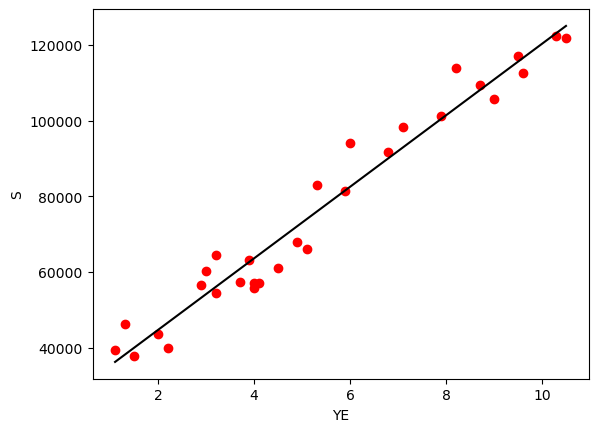

In [80]:
plt.scatter(x=data1['YE'],y=data1['S'],color='red')
plt.plot(data1['YE'],pred,color='black')
plt.xlabel('YE')
plt.ylabel('S') 

In [81]:
model2 = smf.ols('S~np.log(YE)',data=data1).fit()

In [82]:
model2.params

Intercept     14927.97177
np.log(YE)    40581.98796
dtype: float64

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        09:39:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
pred2 = model2.predict(pd.DataFrame(data1['YE'])) 
pred2 

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [85]:
pred2
rmse_log = np.sqrt(np.mean((np.array(data1['S'])-np.array(pred2))**2))
rmse_log 

10302.893706228306

Text(0, 0.5, 'S')

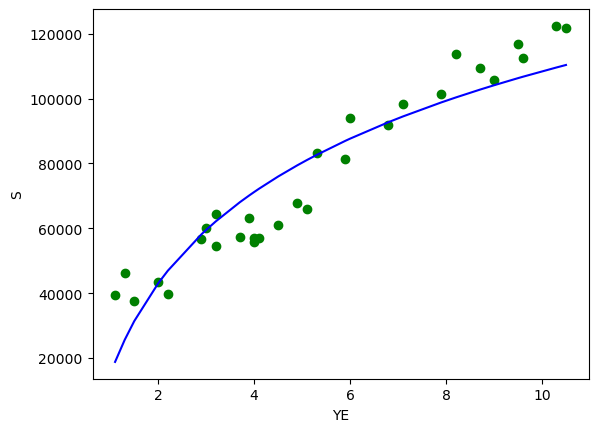

In [87]:
plt.scatter(x=data1['YE'],y=data1['S'],color='green')
plt.plot(data1['YE'],pred2,color='blue')
plt.xlabel('YE')
plt.ylabel('S') 

In [89]:
#exponential model
model3 = smf.ols('np.log(S)~YE',data=data1).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(S)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        09:43:35   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YE             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
pred_log = model3.predict(pd.DataFrame(data1['YE']))

In [91]:
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [92]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [94]:
rmse_exp = np.sqrt(np.mean((np.array(data1['S'])-np.array(pred3))**2)) 
rmse_exp 

7213.235076620096

In [95]:
pred3.corr(data1.S)

0.9660469705377085

Text(0, 0.5, 'S')

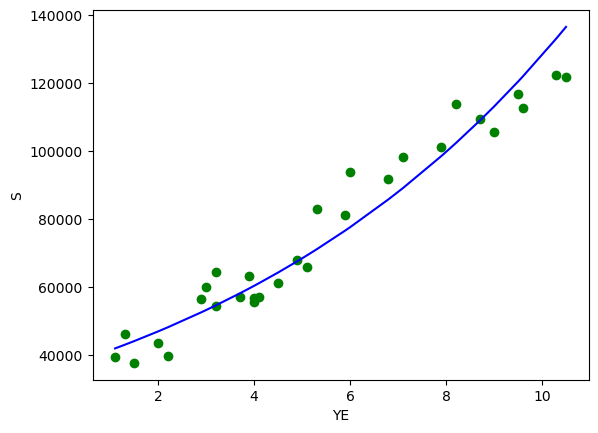

In [96]:
plt.scatter(x=data1['YE'],y=data1['S'],color='green')
plt.plot(data1.YE,pred3,color='blue')
plt.xlabel('YE')
plt.ylabel('S')

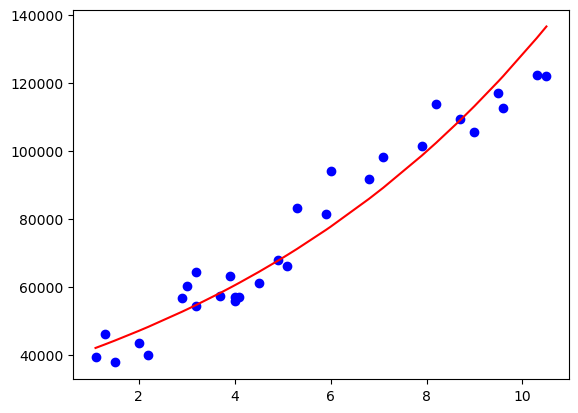

In [97]:
plt.plot(data1['YE'],data1['S'], 'bo')  
plt.plot(data1.YE,pred3,color='red')

In [98]:
resid3 = model3.resid_pearson 
resid3

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Actual')

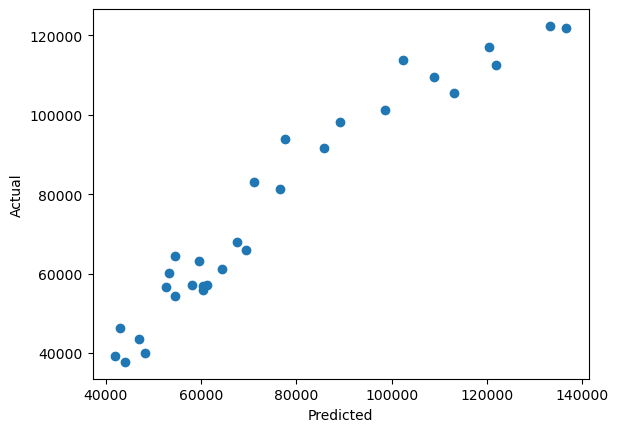

In [99]:
plt.scatter(x=pred3,y=data1.S)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [101]:
data1["YE_Sq"] = data1.YE*data1.YE
data1  

,YE,S,YE_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [102]:
#model_quad.params 
model_quad = smf.ols("np.log(S)~YE+YE_Sq",data=data1).fit()

In [103]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(S)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.95e-18
Time:                        09:57:43   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
YE             0.2024      0.027      7.601      0.000       0.148       0.257
YE_Sq         -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
pred_quad = model_quad.predict(data1)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [106]:
rmse_quad = np.sqrt(np.mean((np.array(data1['S'])-np.array(pred4))**2))
rmse_quad 

5391.08158269361

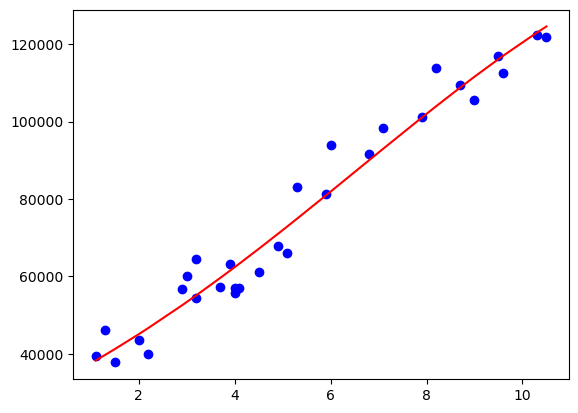

In [107]:
plt.scatter(data1.YE,data1.S,c="b")
plt.plot(data1.YE,pred4,"r") 

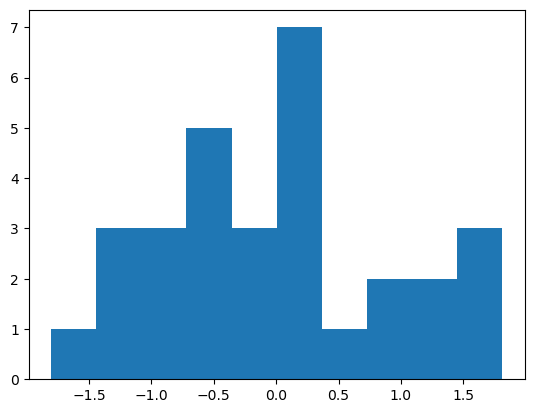

In [109]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [110]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


In [111]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic') 

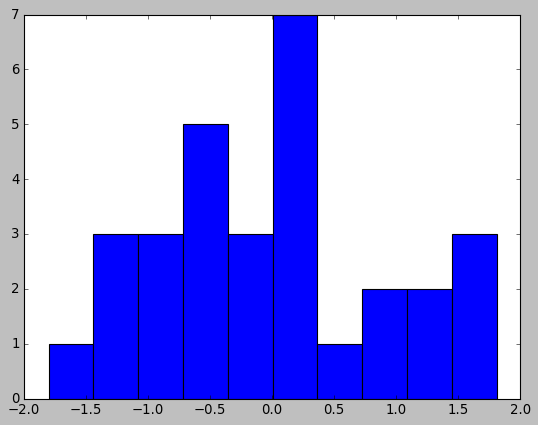

In [112]:
plt.hist(model_quad.resid_pearson)  
plt.show() 

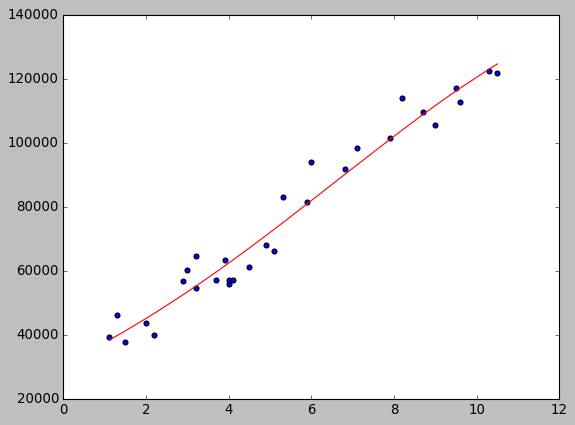

In [113]:
plt.scatter(data1.YE,data1.S,c="b")
plt.plot(data1.YE,pred4,"r")